## Read the file and save it as a data frame

In [67]:
import pandas as pd
import numpy as np

df_diabetes = pd.read_csv('diabetes_dataset.csv')

## Head and Tail of data frame

In [68]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## mean of age

In [70]:
df_diabetes["Age"].mean()

33.240885416666664

## Deviation of blood pressure

In [71]:
df_diabetes["BloodPressure"].std()

19.355807170644777

## Finding empty cells

In [72]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         727 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Filling BMI with mean value

In [73]:
mean_BMI = df_diabetes['BMI'].mean()
df_diabetes['BMI'] = df_diabetes['BMI'].fillna(mean_BMI)
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Show how many patients have and don't have diabetes

In [74]:
df_diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Sort the patients based on their age in ascending order

In [75]:
df_diabetes.sort_values('Age', ascending=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113,64,35,0,33.600000,0.543,21,1
60,2,84,0,0,0,32.445942,0.304,21,0
102,0,125,96,0,0,22.500000,0.262,21,0
182,1,0,74,20,23,27.700000,0.299,21,0
623,0,94,70,27,115,43.500000,0.347,21,0
...,...,...,...,...,...,...,...,...,...
123,5,132,80,0,0,26.800000,0.186,69,0
684,5,136,82,0,0,32.445942,0.640,69,0
666,4,145,82,18,0,32.500000,0.235,70,1
453,2,119,0,0,0,19.600000,0.832,72,0


## Select the patients who are older than 60

In [76]:
cols = ['Age']
age_col = df_diabetes[df_diabetes[cols] >= 60][cols]
age_col.dropna().sort_values('Age')

,Age
30,60.0
93,60.0
186,60.0
212,60.0
519,60.0
115,61.0
223,61.0
582,62.0
129,62.0
579,62.0


## Show mean of each column based on outcome

In [78]:
cols = list(df_diabetes.columns)
df_diabetes.groupby('Outcome', as_index=False)[[*cols]].mean()

,Outcome,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
0,0,31.190000,30.923373,68.184000,0.429734,109.980000,68.792000,3.298000,19.664000
1,1,37.067164,35.286557,70.824627,0.550500,141.257463,100.335821,4.865672,22.164179


## Draw the histogram of the columns in subplots

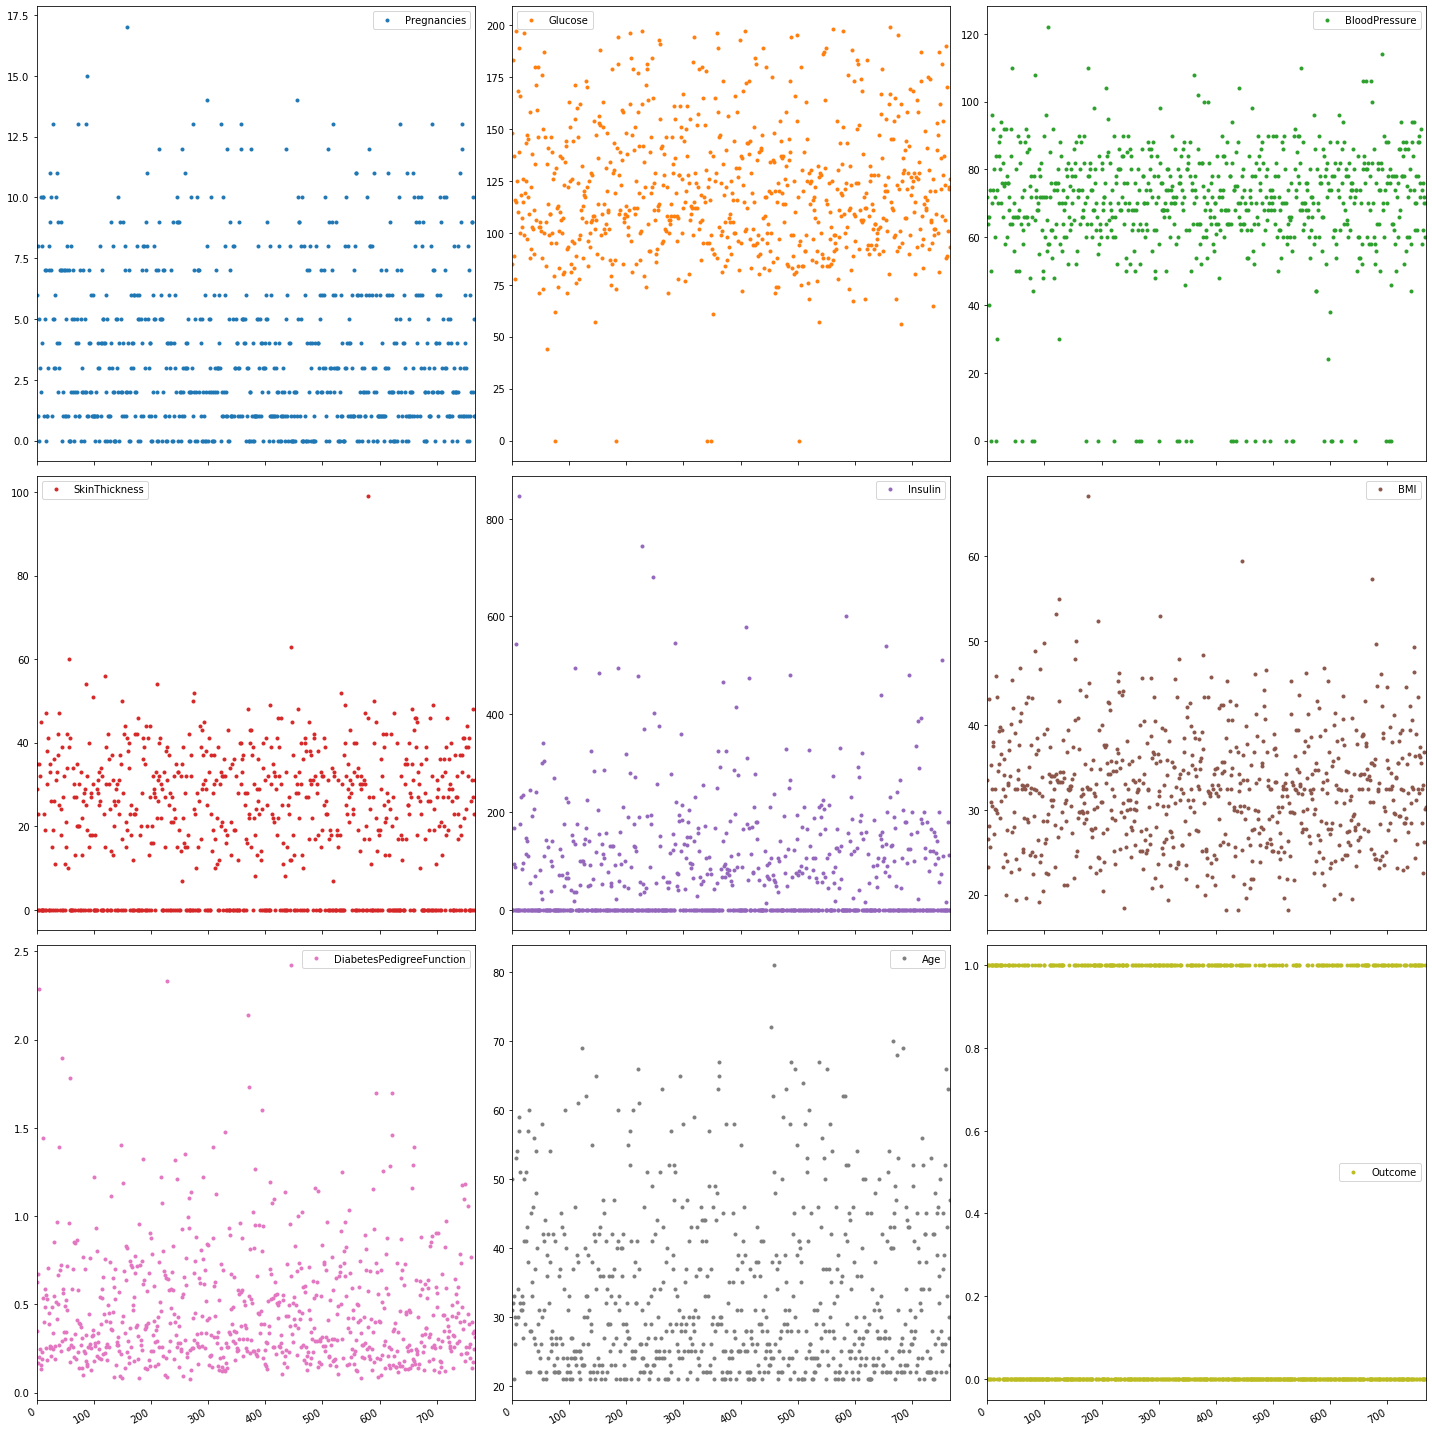

In [102]:
import matplotlib.pyplot as plt

df_diabetes.plot(subplots=True, layout=(3,3), figsize=(20,20), style=".")
plt.tight_layout()
plt.show()

## Plot the correlation of the columns

In [105]:

df_diabetes.corr().style.background_gradient(cmap='coolwarm')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.129459,0.141282,-0.0816718,-0.0735346,0.0229404,-0.0335227,0.544341,0.221898
Glucose,0.129459,1,0.15259,0.0573279,0.331357,0.20808,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.15259,1,0.207371,0.0889334,0.181418,0.0412649,0.239528,0.0650684
SkinThickness,-0.0816718,0.0573279,0.207371,1,0.436783,0.389233,0.183928,-0.11397,0.0747522
Insulin,-0.0735346,0.331357,0.0889334,0.436783,1,0.174094,0.185071,-0.042163,0.130548
BMI,0.0229404,0.20808,0.181418,0.389233,0.174094,1,0.151852,0.0237597,0.308531
DiabetesPedigreeFunction,-0.0335227,0.137337,0.0412649,0.183928,0.185071,0.151852,1,0.0335613,0.173844
Age,0.544341,0.263514,0.239528,-0.11397,-0.042163,0.0237597,0.0335613,1,0.238356
Outcome,0.221898,0.466581,0.0650684,0.0747522,0.130548,0.308531,0.173844,0.238356,1
